In [19]:
options(stringsAsFactors=F)
options(max.print=1000)
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggsci))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(ggsignif))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(gep2pep))
suppressPackageStartupMessages(library(ComplexHeatmap))

options(bitmapType = 'cairo', device = 'png')

setwd('/psycl/g/mpsziller/lucia/SCZ_PGC/eQTL_PROJECT')
fold_notebook <- '/psycl/g/mpsziller/lucia/castom_cad_scz/jupyter_notebook/'
outFold <- sprintf('%sSCZ_clustering/', fold_notebook)
pathSEA_fold <- "clustering_res_matchUKBB_corrPCs/DLPC_CMC/"
pathSEA_file <- "clustering_res_matchUKBB_corrPCs/DLPC_CMC/pathSEA_corrPCs_tscoreClusterCases_featAssociation.txt"
cl_res <- get(load("clustering_res_matchUKBB_corrPCs/DLPC_CMC/matchUKBB_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_minimal.RData"))

cmap_fold <- "/psycl/g/mpsziller/lucia/refData/Cmap_MSigDB_v6.1_PEPs"
pathCluster_file <- sprintf("%sreduced_matchUKBB_pathOriginal_filtJS0.2_corrPCs_tscoreClusterCases_featAssociation.RData", pathSEA_fold)
source(sprintf("%s/Functions_summary_pathSEA.R", fold_notebook))

pathSEA <- read.delim(pathSEA_file, h=T, stringsAsFactors = F, sep = "\t")

   
    down-reg pathways up-reg pathways
  1                31               0
  2                 0              12
  3                 0              30

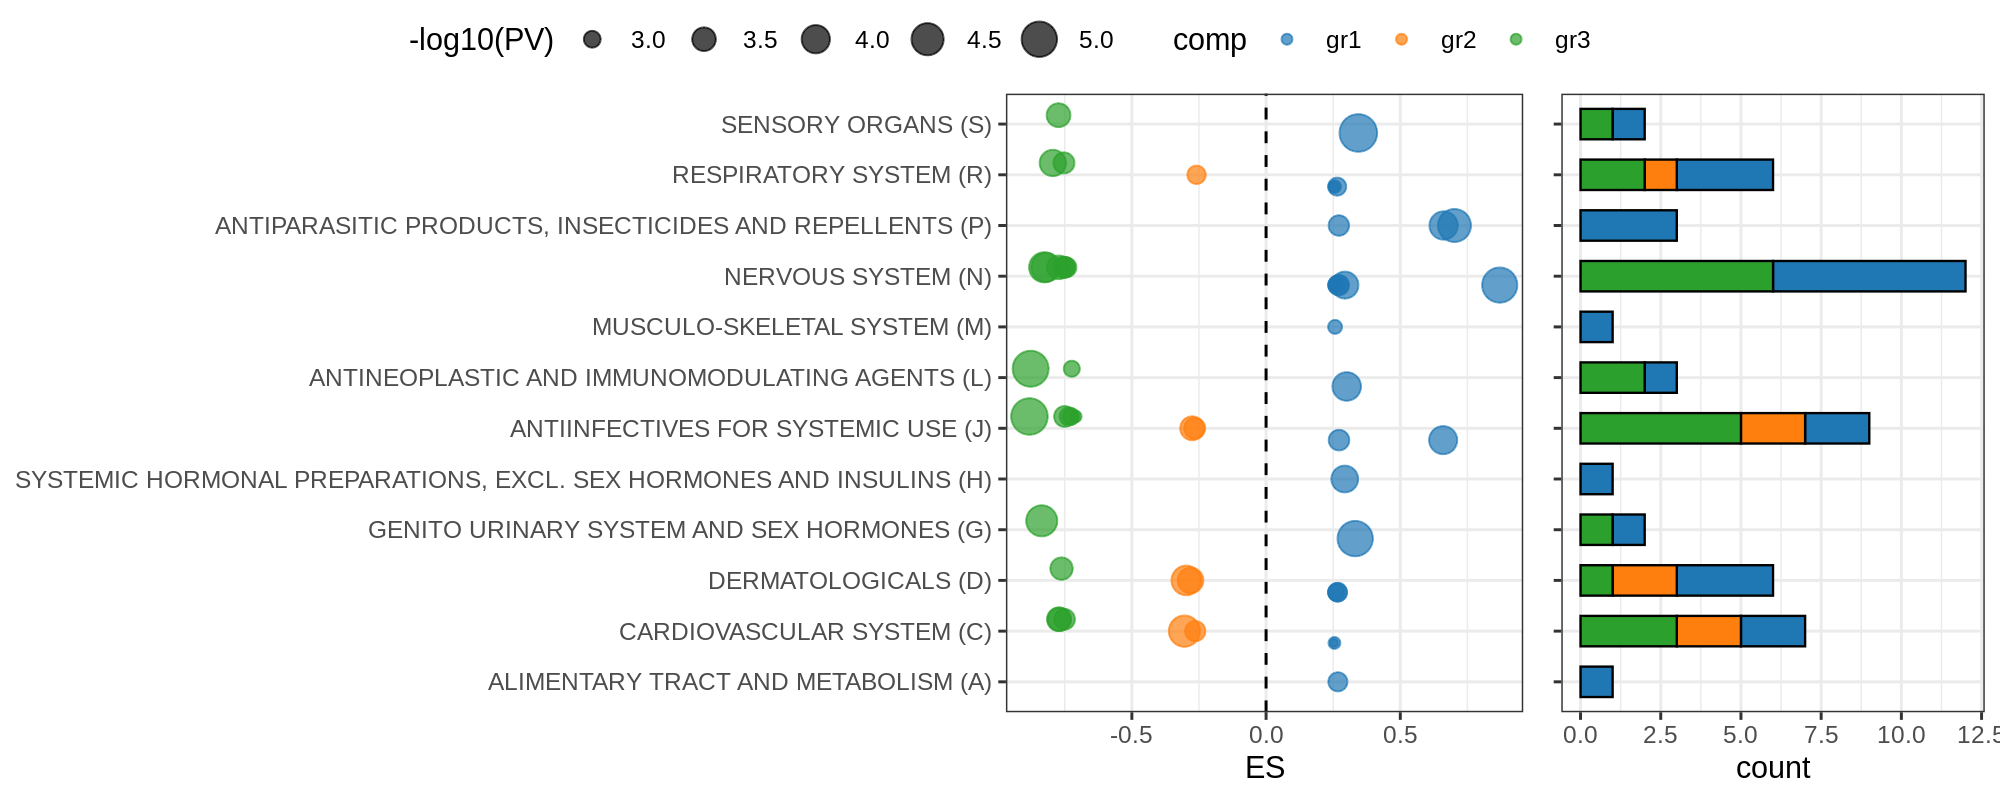

In [2]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 200)

table(pathSEA$gr, pathSEA$type)

pl <- plot_summary_pathSEA(cl_res, pathSEA)
pl
ggsave(filename = sprintf('%sDLPC_pathSEA_drugNames_summary.pdf', outFold), 
       plot = pl, width = 10, height = 4)

In [3]:
atc1_names <- na.omit(unique(pathSEA$atc_meaning1))
atc_color <- get_color_atc(atc_codes = atc1_names)

FDR_thr <- 0.01
path_feat <- get(load(pathCluster_file))

gr_res <- get_group_specific_path(path_feat, FDR_thr)
df_names_R <- standardize_pathway_names("Reactome", path_feat$res_pval)
df_names_GO <- standardize_pathway_names("GO", path_feat$res_pval)
    
rpBig <- openRepository(cmap_fold)
Reactome_coll <- loadCollection(rpBig,"C2_CP:REACTOME")
GO_MF_coll <- loadCollection(rpBig,"C5_MF")
GO_BP_coll <- loadCollection(rpBig,"C5_BP")
GO_CC_coll <- loadCollection(rpBig,"C5_CC")

df_collname <- data.frame(
    v1 = c("C2_CP:REACTOME", "C5_MF", "C5_BP", "C5_CC"), 
    v2 = c("Reactome", "GO_MF", "GO_BP", "GO_CC"))

gr_tot <- sort(unique(pathSEA$gr))

# general for each group
dp_gr <- lapply(gr_tot, function(x) 
    get_drug_pathway_df(pathSEA = pathSEA, gr_id = x, keep_na = FALSE))


Found repo index in "/psycl/g/mpsziller/lucia/refData/Cmap_MSigDB_v6.1_PEPs/R_repo.RDS".



In [8]:
table(pathSEA$db, pathSEA$gr)

       
         1  2  3
  GO_BP 26 12  0
  GO_CC  3  0  0
  GO_MF  2  0 30

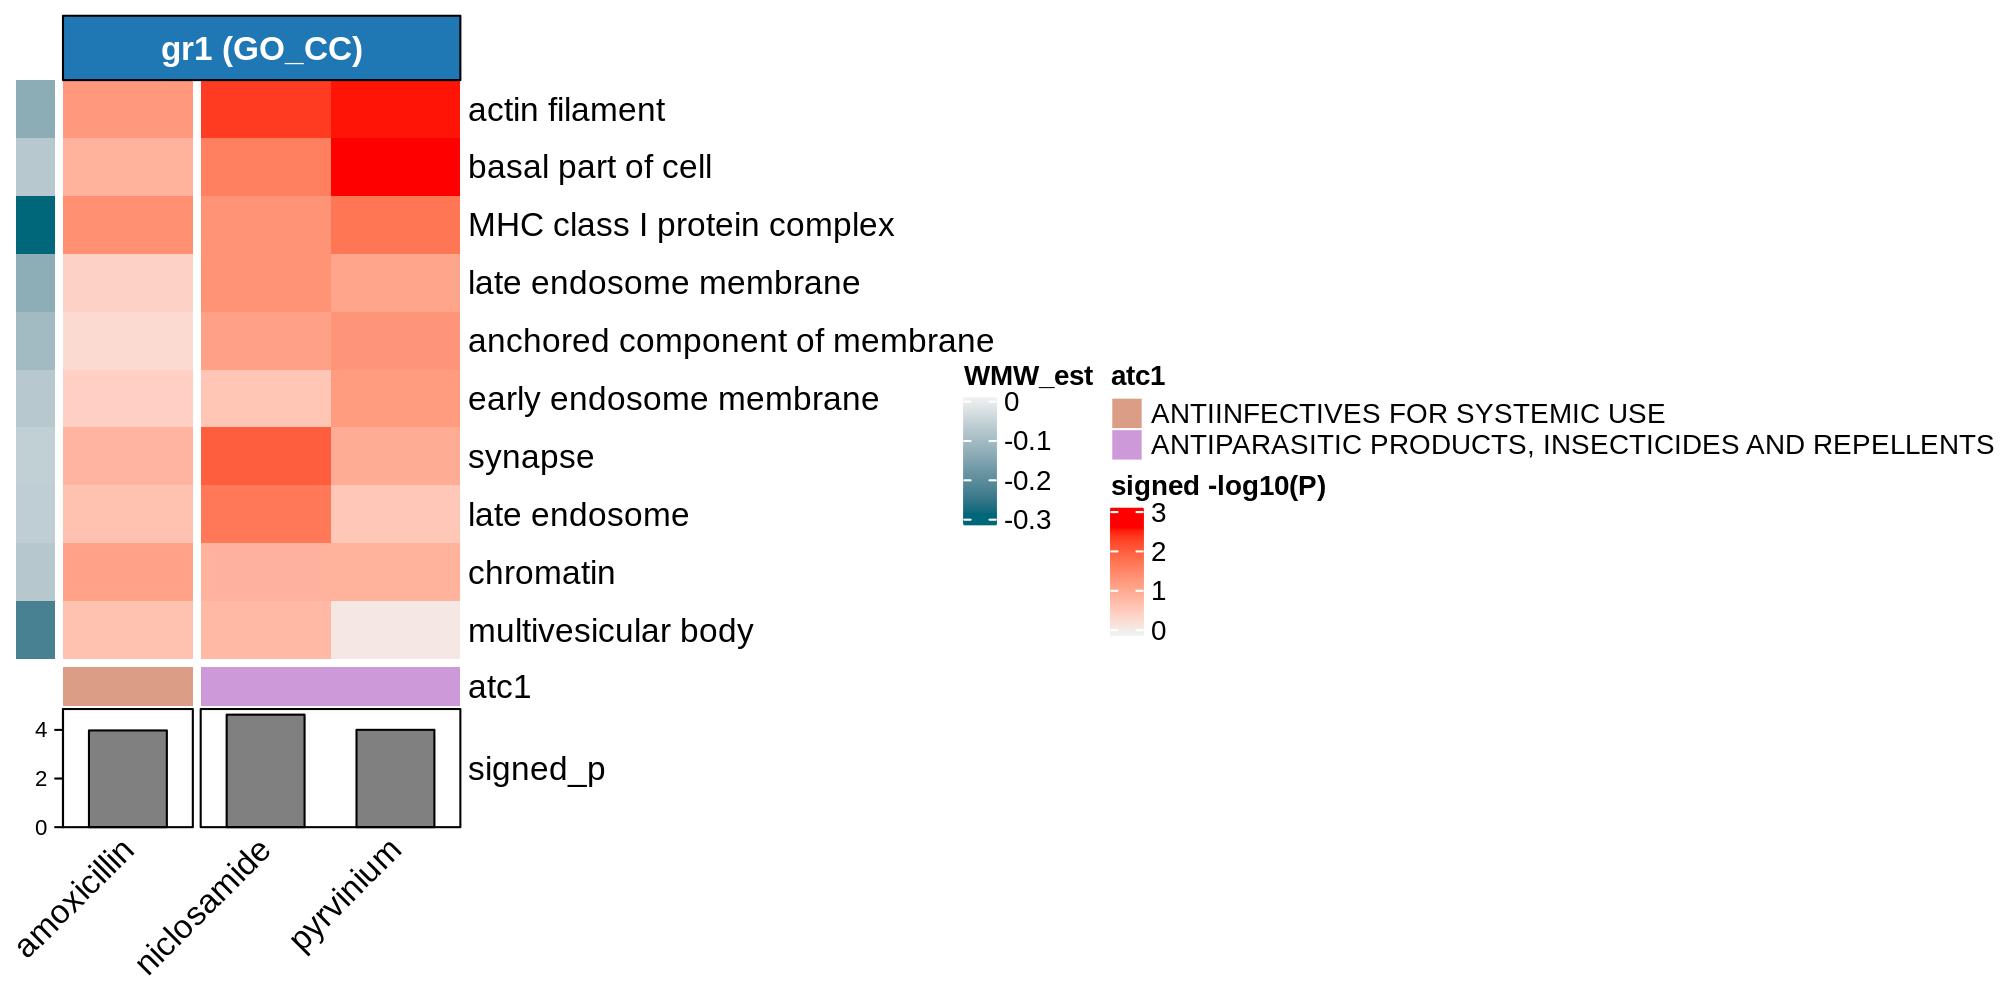

In [29]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 200)
plot_drug_pathway(gr_id = 1, db_id = 2, dp_gr = dp_gr, 
                  pathSEA = pathSEA, gr_res = gr_res, 
                  atc_color = atc_color, 
                  width_plot = 10, 
                  height_plot = 5, 
                  outFold = outFold)

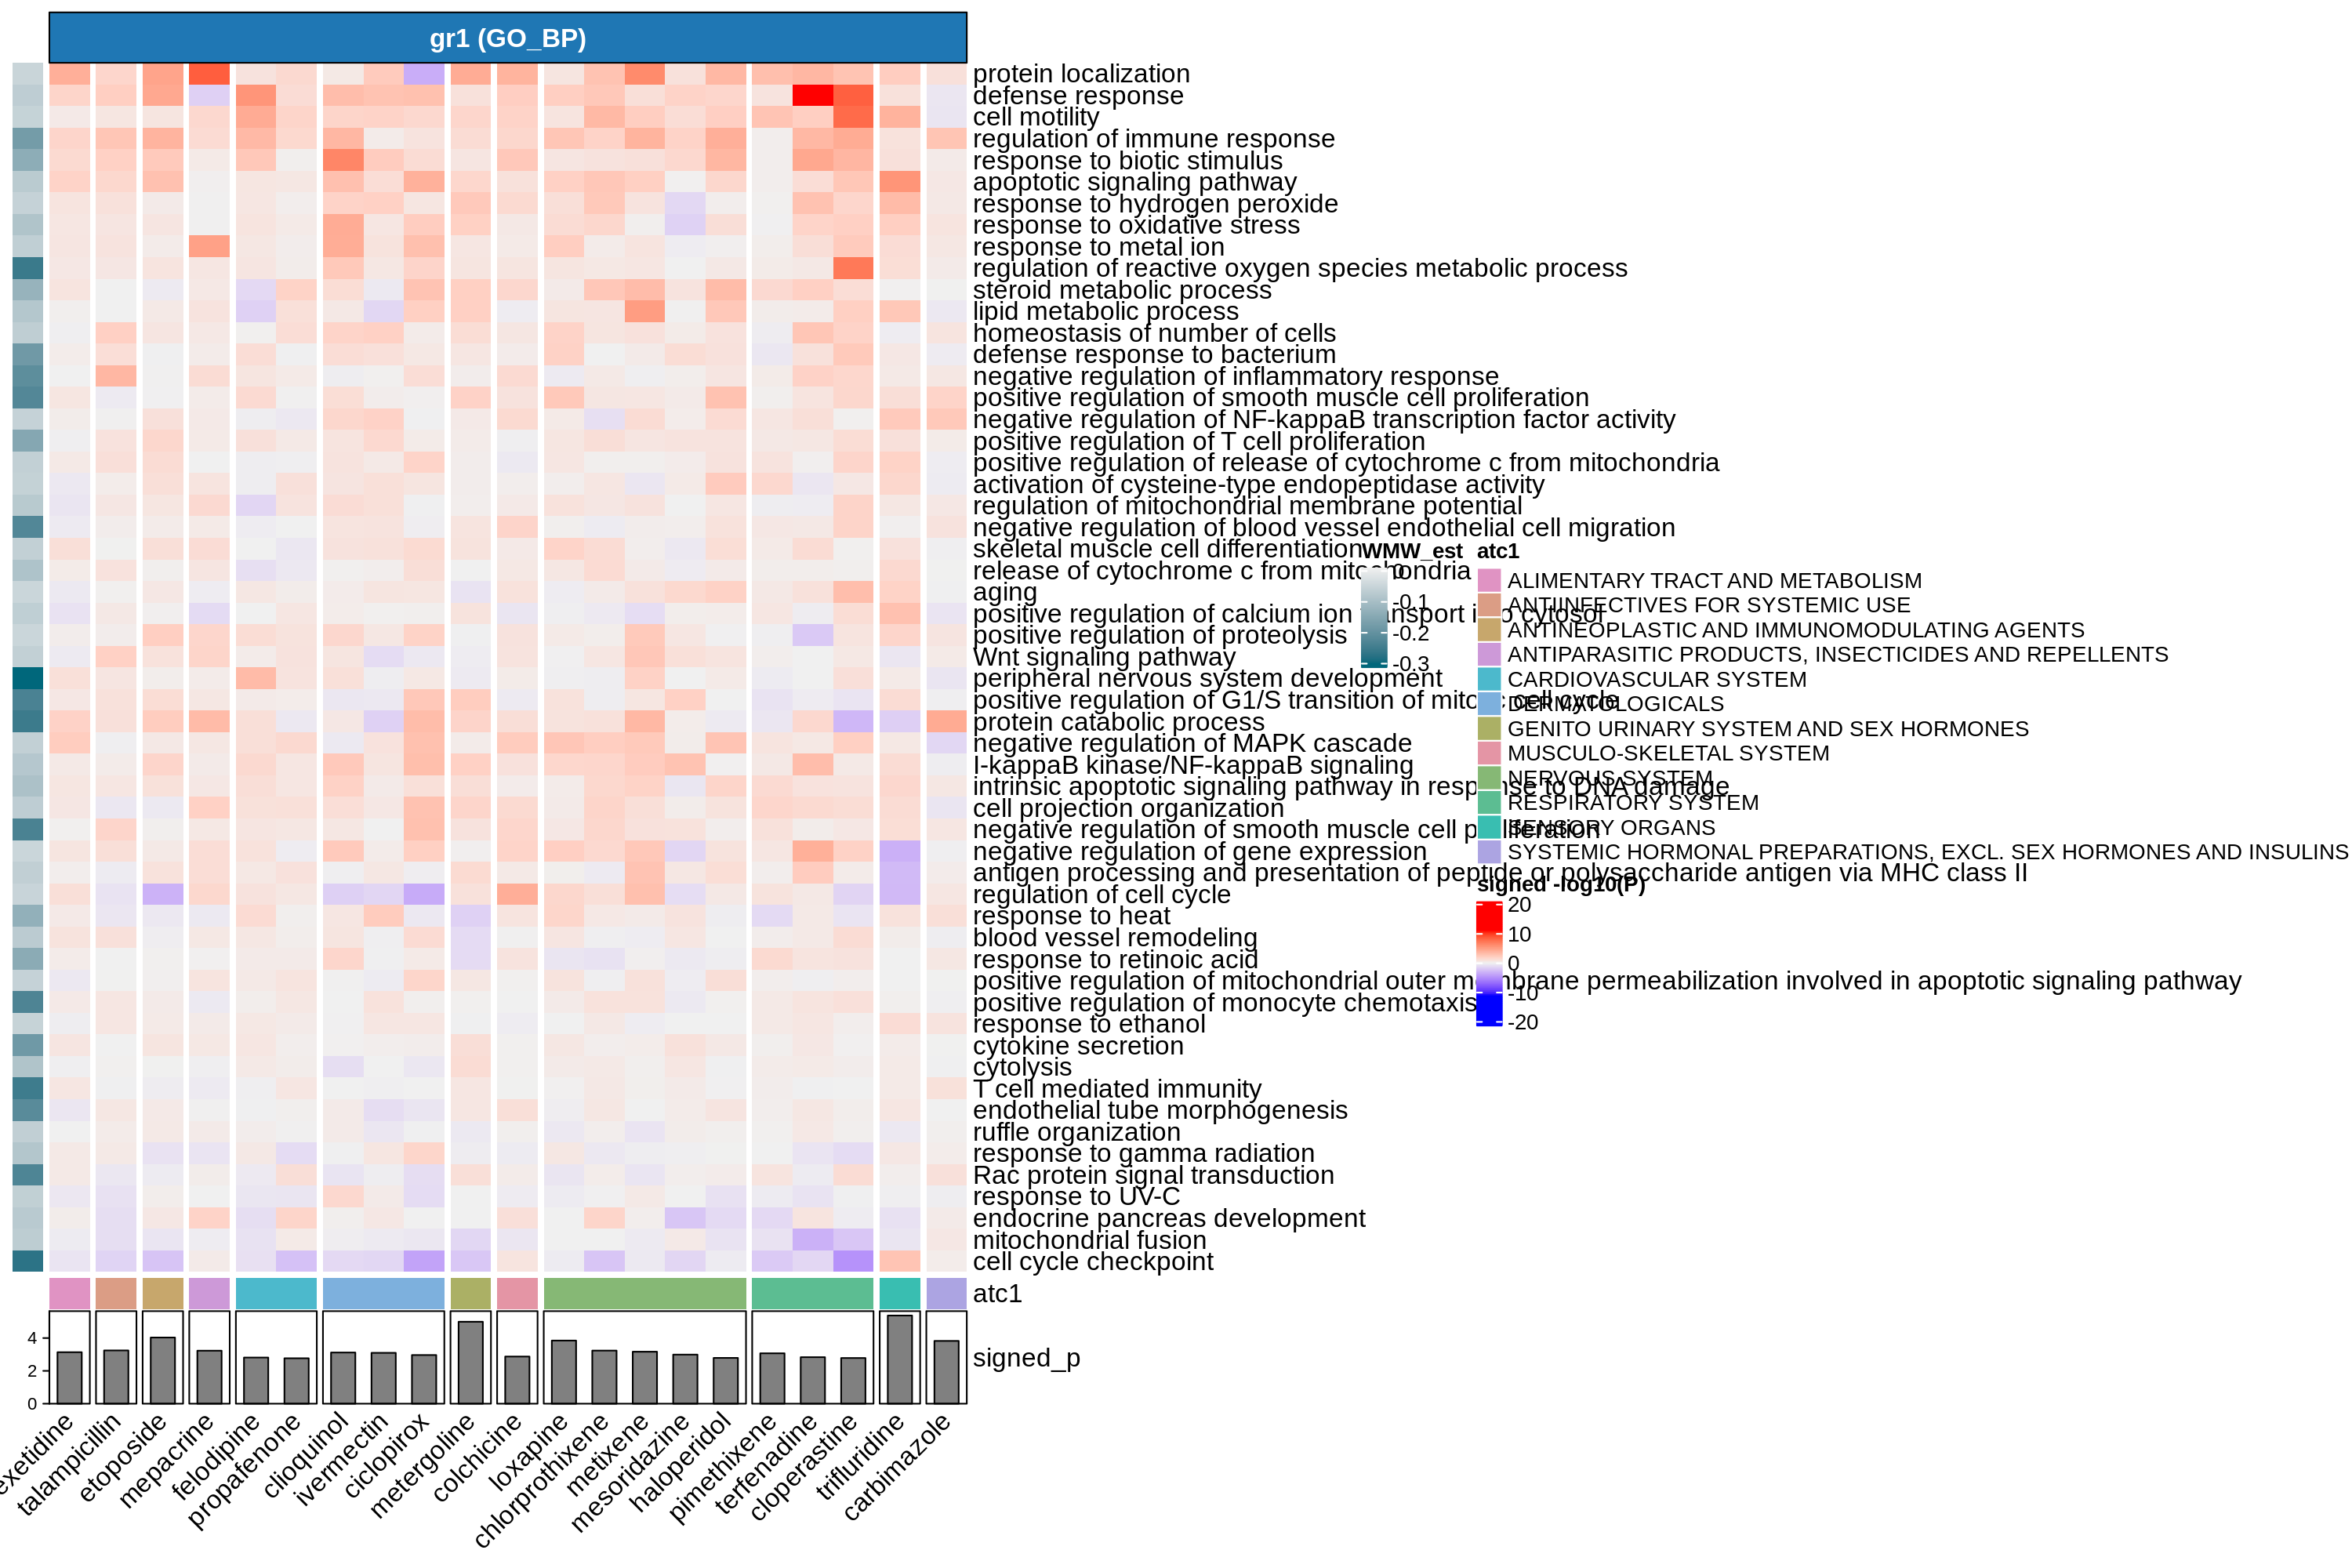

In [33]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 200)

plot_drug_pathway(gr_id = 1, db_id = 3, dp_gr = dp_gr, 
                  pathSEA = pathSEA, gr_res = gr_res, 
                  atc_color = atc_color, 
                  width_plot = 15, 
                  height_plot = 10, 
                  outFold = outFold)

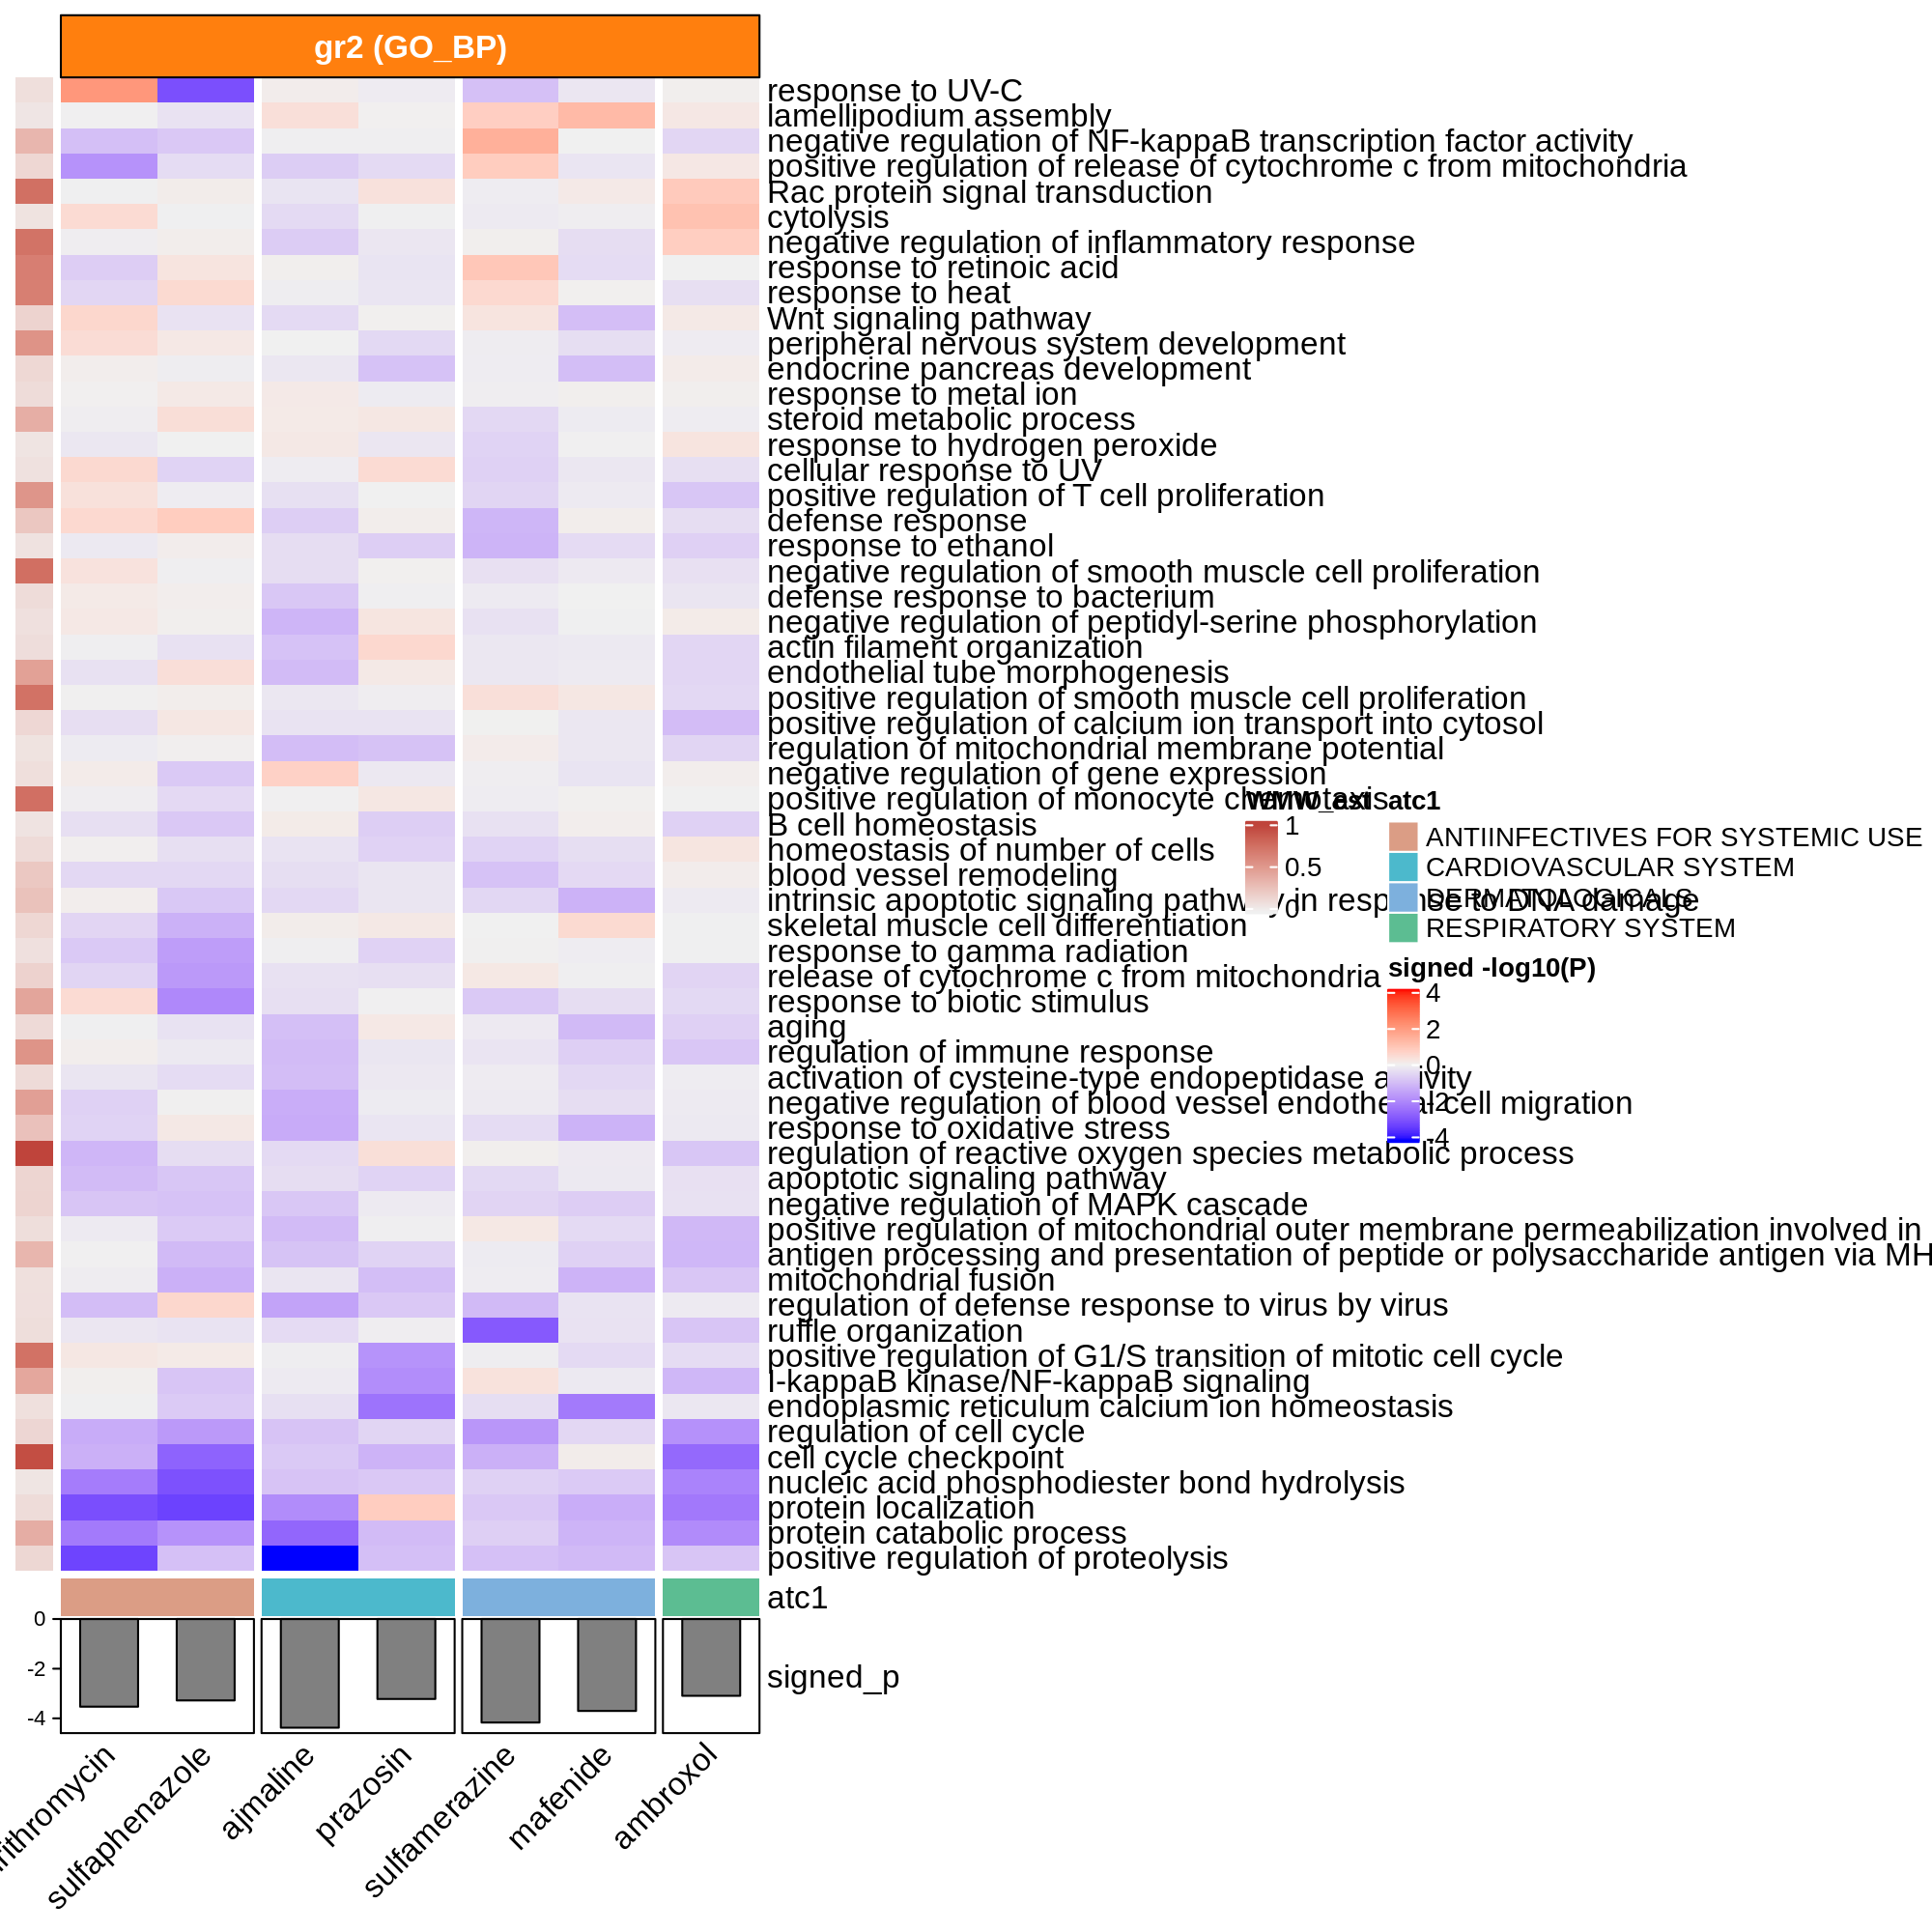

In [35]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 200)
plot_drug_pathway(gr_id = 2, db_id = 1, dp_gr = dp_gr, 
                  pathSEA = pathSEA, gr_res = gr_res, 
                  atc_color = atc_color, 
                  width_plot = 10, height_plot = 10, 
                  outFold = outFold)

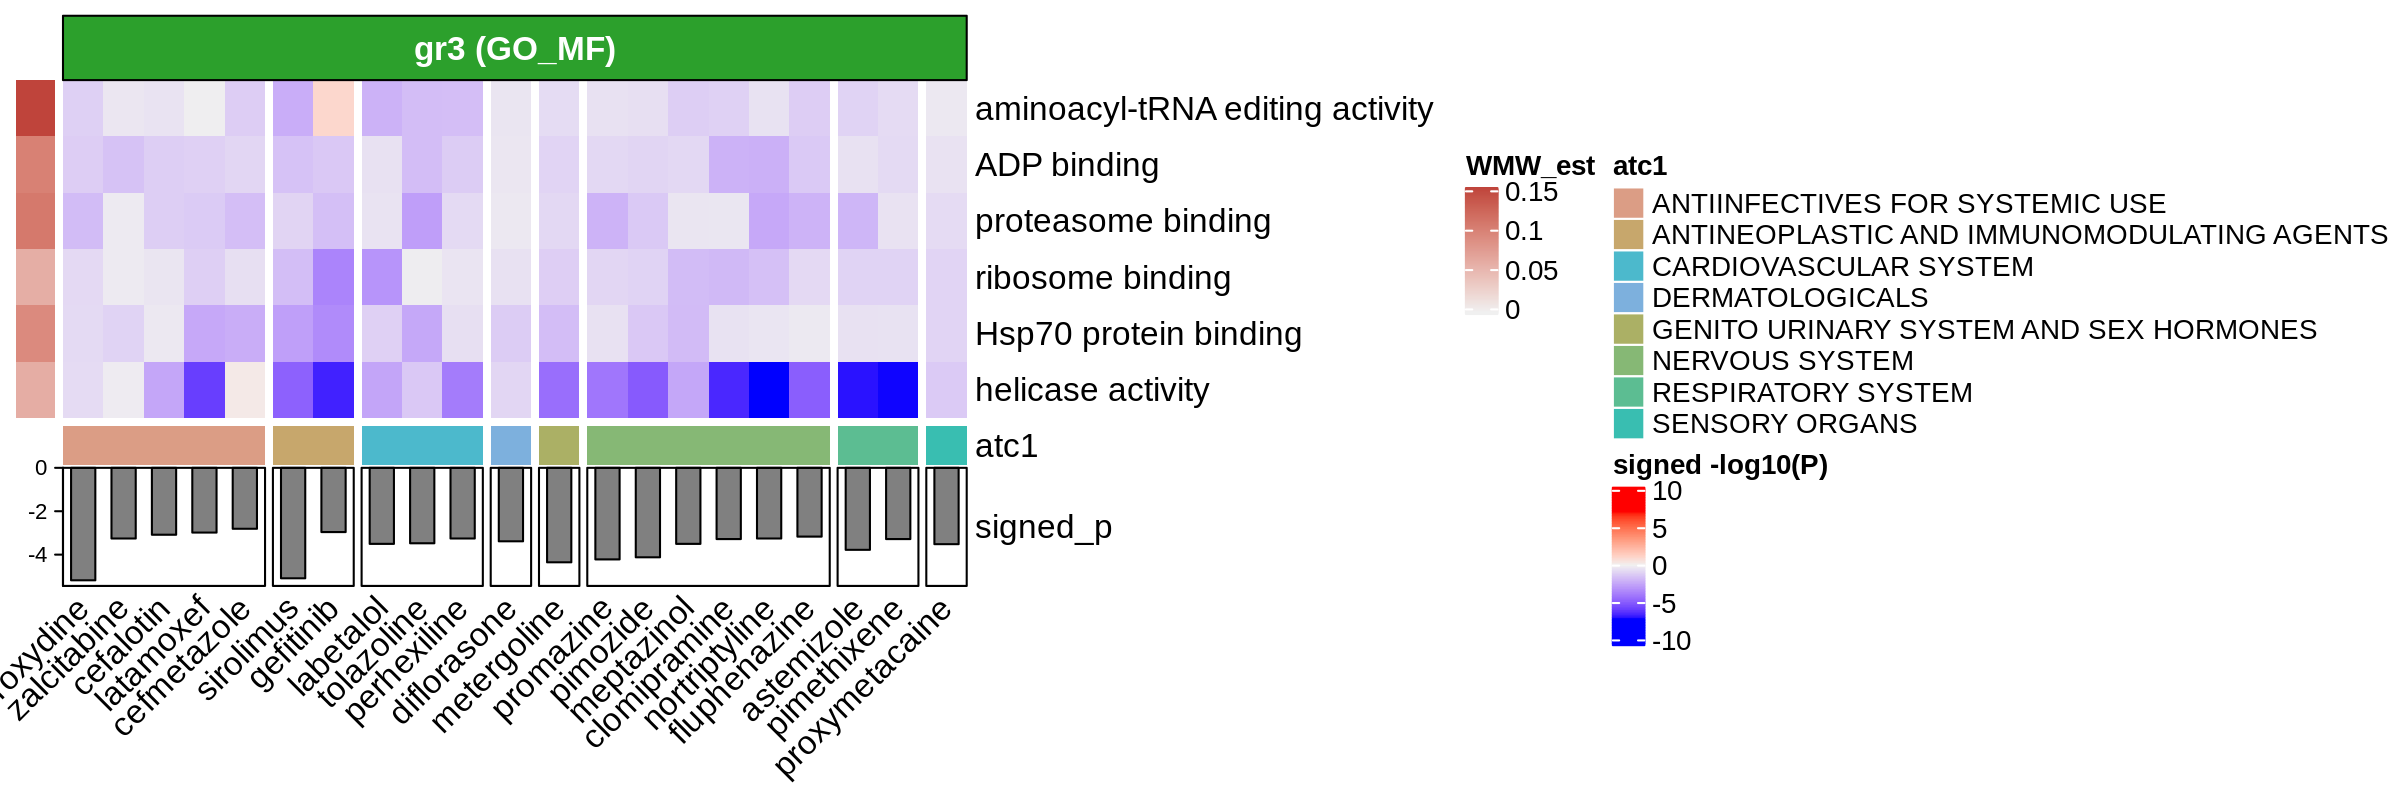

In [39]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
plot_drug_pathway(gr_id = 3, db_id = 1, dp_gr = dp_gr, 
                  pathSEA = pathSEA, gr_res = gr_res, 
                  atc_color = atc_color, 
                  width_plot = 12, height_plot = 4, 
                  outFold = outFold)